In [57]:
import numpy as np
import random 
import math
import matplotlib.pyplot as plt


In [58]:
# define arrival process
def arrival_process(lambd):
    # a bernoulli random variable with parameter lambda
    pr = random.random()
    if pr < lambd:
        return 1
    else:
        return 0
    
# define service process
def service_process(mu):
    # a bernoulli random variable with parameter mu
    pr = random.random()
    if pr < mu:
        return 1
    else:
        return 0

In [59]:
mu = 0.9 
T = 10000  # number of time slots
avg_queue_size = []
avg_sojourn_time = [] 
lambda_range = np.linspace(0, 1, 10)

for lambd in lambda_range:
    ql = 0  # queue length
    q = []  # queue length at time t
    s = []  # service time at time t
    a = []  # arrival time at time t
    sojourn_times = []  # departure time at time t
    for t in range(T):
        # arrival process
        if arrival_process(lambd) == 1:
            ql += 1
            a.append(t)
        # service process
        if service_process(mu) == 1:
            if (ql > 0):
                ql -= 1
                s.append(t)
        q.append(ql)

    avg_queue_size.append(np.mean(q))
    for i in range(len(s)):
        sojourn_times.append(s[i] - a[i])
    avg_sojourn_time.append(np.mean(sojourn_times))
    

# Part 1 (Plot average query size vs. lambda)

lambda =  0.1  avg_queue_size =  0.0
lambda =  0.2  avg_queue_size =  0.0173
lambda =  0.3  avg_queue_size =  0.0323
lambda =  0.4  avg_queue_size =  0.0572
lambda =  0.5  avg_queue_size =  0.1108
lambda =  0.6  avg_queue_size =  0.171
lambda =  0.7  avg_queue_size =  0.2634
lambda =  0.8  avg_queue_size =  0.6562
lambda =  0.9  avg_queue_size =  14.0176


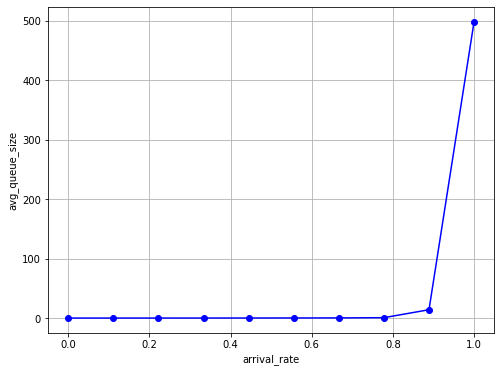

In [60]:
# print avg_queue_size against lambda
for i in range(1, len(avg_queue_size)):
    print("lambda = ", i/10, " avg_queue_size = ", avg_queue_size[i-1])


# plot avg_queue_size against lamb
plt.figure(figsize=(8, 6))
plt.plot(lambda_range, avg_queue_size, '-bo')
plt.grid()
plt.xlabel("arrival_rate")
plt.ylabel("avg_queue_size")
plt.show()

# Part 3 (Plot average soujourn time vs. lambda)

lambda =  0.1  avg_sojourn_time =  nan
lambda =  0.2  avg_sojourn_time =  0.1595940959409594
lambda =  0.3  avg_sojourn_time =  0.1472196900638104
lambda =  0.4  avg_sojourn_time =  0.1741915802318487
lambda =  0.5  avg_sojourn_time =  0.2438380281690141
lambda =  0.6  avg_sojourn_time =  0.3068916008614501
lambda =  0.7  avg_sojourn_time =  0.3976449275362319
lambda =  0.8  avg_sojourn_time =  0.8439670697195781
lambda =  0.9  avg_sojourn_time =  15.787363441829035


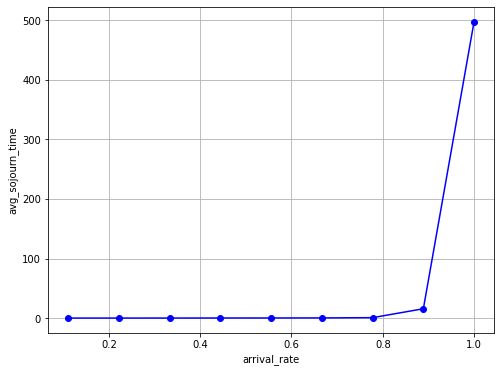

In [61]:
# print avg_sojourn_time against lamb
for i in range(1, len(avg_sojourn_time)):
    print("lambda = ", i/10, " avg_sojourn_time = ", avg_sojourn_time[i-1])

# plot avg_sojourn_time against lamb
plt.figure(figsize=(8, 6))
plt.plot(lambda_range, avg_sojourn_time, '-bo')
plt.grid()
plt.xlabel("arrival_rate")
plt.ylabel("avg_sojourn_time")
plt.show()

### Plotting avg_queue size and avg_soujourn time vs lambda

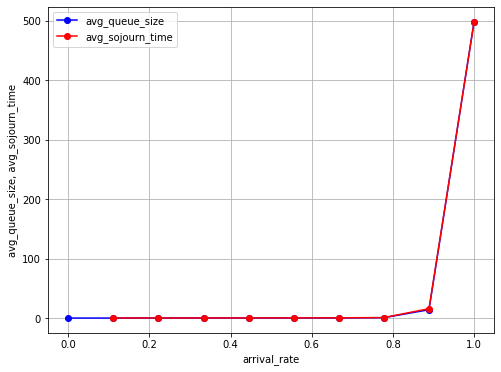

In [62]:
# plot avg_queue_size, avg_sojourn_time against lambda
plt.figure(figsize=(8, 6))
plt.plot(lambda_range, avg_queue_size, '-bo', label="avg_queue_size")
plt.plot(lambda_range, avg_sojourn_time, '-ro', label="avg_sojourn_time")
plt.grid()
plt.xlabel("arrival_rate")
plt.ylabel("avg_queue_size, avg_sojourn_time")
plt.legend()
plt.show()

# Part 2 (Computing the stationary distribution)

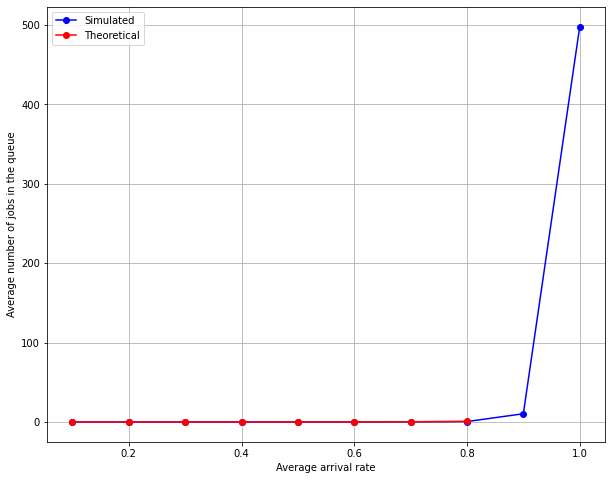

In [49]:
import warnings
warnings.filterwarnings('ignore')
# Computing the stationary distribution
n = 10000 # Number of simulations
mu = 0.9 # Service rate
theoretical = []

# run the simulations for different values of lamdb1
for lambd in np.linspace(0.1, 1, 10):
    p = lambd * (1 - mu) / (mu * (1 - lambd))
    Pi = np.zeros(n)
    Pi[0] = (1 - p) / (1 - p**(n))
    for i in range(1, n):
        Pi[i] = p**(i) * Pi[0]

    # expected value 
    E = 0
    for i in range(n):
        E += i * Pi[i]
    theoretical.append(E)

# plot between the theoretical and simulated values of average number in queue
plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(np.linspace(0.1, 1, 10), avg_queue_size, '-bo')
plt.plot(np.linspace(0.1, 1, 10), theoretical, '-ro')
plt.xlabel("Average arrival rate")
plt.ylabel("Average number of jobs in the queue")
plt.legend(["Simulated", "Theoretical"])
plt.show()


# Part 4 (Little's Law)

Ratio for lambda1 =  0.1  is  nan
Ratio for lambda1 =  0.2  is  0.1094
Ratio for lambda1 =  0.30000000000000004  is  0.21630000000000002
Ratio for lambda1 =  0.4  is  0.3307
Ratio for lambda1 =  0.5  is  0.455
Ratio for lambda1 =  0.6  is  0.5549
Ratio for lambda1 =  0.7000000000000001  is  0.6699999999999999
Ratio for lambda1 =  0.8  is  0.7802
Ratio for lambda1 =  0.9  is  0.8926000000000001
Ratio for lambda1 =  1.0  is  1.0026017572424597


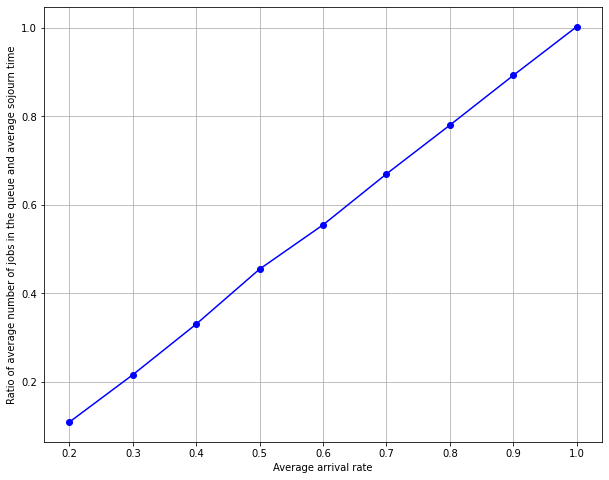

In [50]:
# Part c: Little' Law
# plotting the ration of average number of jobs in the queue and average sojourn time against lambda1
ratio = np.divide(np.array(avg_queue_size), np.array(avg_sojourn_time))
# print ratio against lambda1
for i in range(len(ratio)):
    print("Ratio for lambda1 = ", np.linspace(0.1, 1, 10)[i], " is ", ratio[i])
plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(np.linspace(0.1, 1, 10), ratio, '-bo')
plt.xlabel("Average arrival rate")
plt.ylabel("Ratio of average number of jobs in the queue and average sojourn time")
plt.show()

The linear curve proves the equivalence of Little's theorem which says that 
Average queue size = Average arrival rate * Average time spent in the system 